In [1]:
%pip install yellowbrick


     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/282.6 kB ? eta -:--:--
     -------- ---------------------------- 61.4/282.6 kB 550.5 kB/s eta 0:00:01
     ------------ ------------------------ 92.2/282.6 kB 751.6 kB/s eta 0:00:01
     ------------ ------------------------ 92.2/282.6 kB 751.6 kB/s eta 0:00:01
     ------------------------ ----------- 194.6/282.6 kB 908.0 kB/s eta 0:00:01
     ------------------------ ----------- 194.6/282.6 kB 908.0 kB/s eta 0:00:01
     -----------------------------------  276.5/282.6 kB 853.3 kB/s eta 0:00:01
     ------------------------------------ 282.6/282.6 kB 794.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
import pandas as pd
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
df.columns=['CustomerID','Gender','Age','Income','Spend']
df.head()

,CustomerID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Classify similar customers on basis of income and spend

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

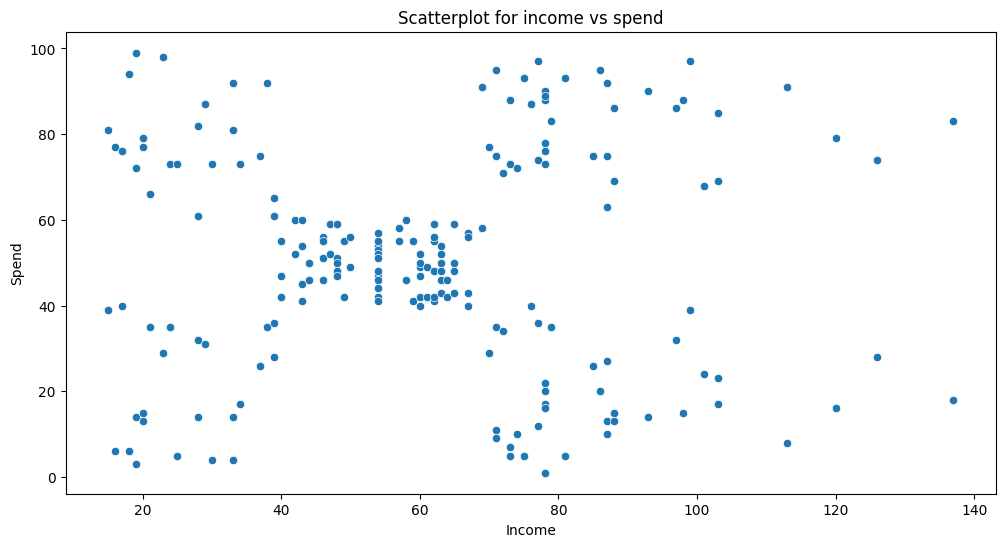

In [14]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='Income',y='Spend')
plt.title('Scatterplot for income vs spend')
plt.show()

In [18]:
X=df[['Income','Spend']]
X.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Process the X data

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [16]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                         ('scaler',StandardScaler())]).set_output(transform='pandas')

In [24]:
X_pre=num_pipe.fit_transform(X)
X_pre.head()

,Income,Spend
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


### For Kmean method find Optimal value of K with Elbow method

In [25]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans

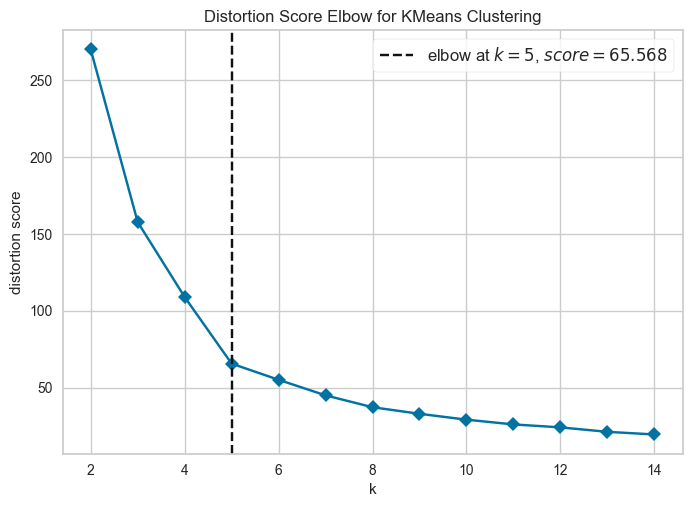

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [26]:
kelbow_visualizer(KMeans(),X_pre,k=(2,15),timings=False)

### Crteate a KMeans model with number of clusters as 5

In [29]:
model=KMeans(n_clusters=5)
model.fit(X_pre)

KMeans(n_clusters=5)

In [30]:
model.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [31]:
X.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [32]:
X['Lable']=model.labels_

In [33]:
X

,Income,Spend,Lable
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


In [34]:
X['Lable'].unique()

array([4, 3, 1, 2, 0])

In [35]:
X[X['Lable']==0]

,Income,Spend,Lable
124,70,29,0
128,71,11,0
130,71,9,0
134,73,5,0
136,73,7,0
138,74,10,0
140,75,5,0
144,77,12,0
146,77,36,0
148,78,22,0


In [36]:
X[X['Lable']==1]

,Income,Spend,Lable
43,39,61,1
46,40,55,1
47,40,47,1
48,40,42,1
49,40,42,1
...,...,...,...
121,67,40,1
122,69,58,1
126,71,35,1
132,72,34,1


In [37]:
X[X['Lable']==2]

,Income,Spend,Lable
123,69,91,2
125,70,77,2
127,71,95,2
129,71,75,2
131,71,75,2
133,72,71,2
135,73,88,2
137,73,73,2
139,74,72,2
141,75,93,2


In [38]:
X[X['Lable']==3]

,Income,Spend,Lable
1,15,81,3
3,16,77,3
5,17,76,3
7,18,94,3
9,19,72,3
11,19,99,3
13,20,77,3
15,20,79,3
17,21,66,3
19,23,98,3


In [39]:
X[X['Lable']==4]

,Income,Spend,Lable
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4
10,19,14,4
12,20,15,4
14,20,13,4
16,21,35,4
18,23,29,4


### Visualize above cluster

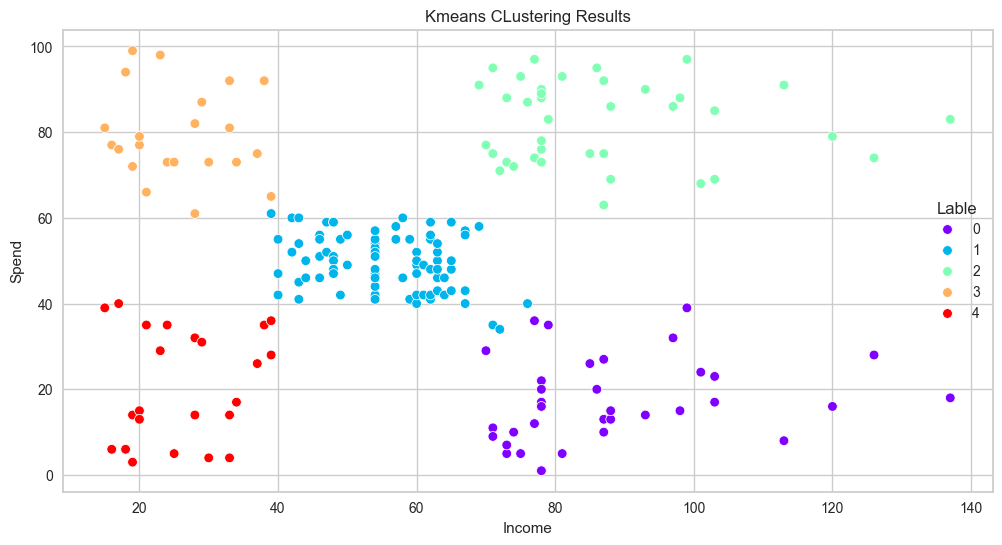

In [41]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=X,x='Income',y='Spend',hue='Lable',palette='rainbow')
plt.title('Kmeans CLustering Results')
plt.show()

### Cluster Similar customers on basis od Age,Income,Spending

In [42]:
x2=df[['Age','Income','Spend']]
x2

,Age,Income,Spend
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [43]:
num_pipe2=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                          ('scaler',StandardScaler())]).set_output(transform='pandas')

In [44]:
x2_pre=num_pipe2.fit_transform(x2)
x2_pre.head()

,Age,Income,Spend
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


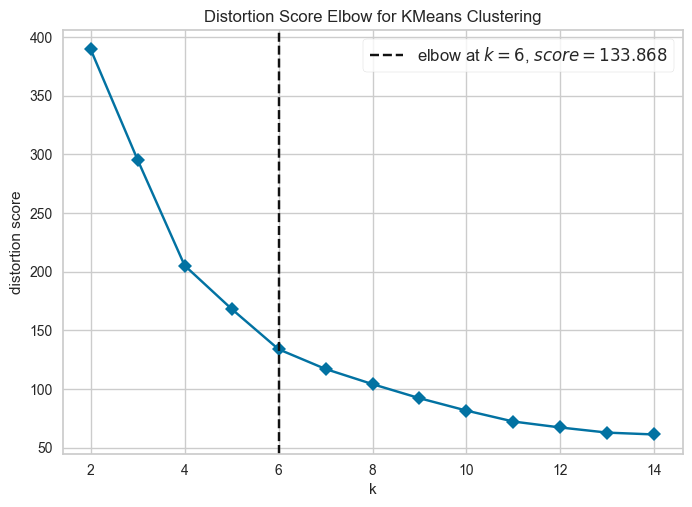

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [45]:
kelbow_visualizer(KMeans(),
                  x2_pre,k=(2,15),
                  timings=False)

In [46]:
model2=KMeans(n_clusters=6)
model2.fit(x2_pre)

KMeans(n_clusters=6)

In [48]:
x2['Label']=model2.labels_

In [49]:
x2.head()

,Age,Income,Spend,Label
0,19,15,39,1
1,21,15,81,1
2,20,16,6,3
3,23,16,77,1
4,31,17,40,3


In [50]:
x2['Label'].unique()

array([1, 3, 5, 4, 2, 0])

In [51]:
for i in range(6):
    print(f'Cluster Number : {i}\n')
    display(x2[x2['Label']==i])
    print("\n=========================================================================\n")

Cluster Number : 0



,Age,Income,Spend,Label
126,43,71,35,0
128,59,71,11,0
130,47,71,9,0
134,20,73,5,0
136,44,73,7,0
138,19,74,10,0
140,57,75,5,0
144,25,77,12,0
146,48,77,36,0
148,34,78,22,0




Cluster Number : 1



,Age,Income,Spend,Label
0,19,15,39,1
1,21,15,81,1
3,23,16,77,1
5,22,17,76,1
7,23,18,94,1
9,30,19,72,1
11,35,19,99,1
13,24,20,77,1
15,22,20,79,1
17,20,21,66,1




Cluster Number : 2



,Age,Income,Spend,Label
123,39,69,91,2
125,31,70,77,2
127,40,71,95,2
129,38,71,75,2
131,39,71,75,2
133,31,72,71,2
135,29,73,88,2
137,32,73,73,2
139,35,74,72,2
141,32,75,93,2




Cluster Number : 3



,Age,Income,Spend,Label
2,20,16,6,3
4,31,17,40,3
6,35,18,6,3
8,64,19,3,3
10,67,19,14,3
12,58,20,15,3
14,37,20,13,3
16,35,21,35,3
18,52,23,29,3
20,35,24,35,3




Cluster Number : 4



,Age,Income,Spend,Label
43,31,39,61,4
47,27,40,47,4
48,29,40,42,4
49,31,40,42,4
51,33,42,60,4
52,31,43,54,4
58,27,46,51,4
61,19,46,55,4
65,18,48,59,4
68,19,48,59,4




Cluster Number : 5



,Age,Income,Spend,Label
40,65,38,35,5
46,50,40,55,5
50,49,42,52,5
53,59,43,60,5
54,50,43,45,5
55,47,43,41,5
56,51,44,50,5
57,69,44,46,5
59,53,46,46,5
60,70,46,56,5


### Install Plotly and nbformat

In [53]:
%pip install plotly nbformat

### Visualize the 3d scatterplot for clustering

In [ ]:
import plotly.express as px

In [ ]:
fig=px.scatter_3d(data_frame=x2,x='Age',y='Income',z='Spend',color='Label')
fig.show()